In [1]:
# this mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'CV7062610/assignments/assignment3/'
FOLDERNAME = 'Neorio/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Mounted at /content/drive


# **First try implementation**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# # Generate the training data (non-uniform distribution)
# data = np.zeros((1000, 2))
# data[:, 1] = np.random.rand(1000)
def runKohonan(data, num_neurons, num_iterations, lr, neurons= None, init_radius = None) -> np.ndarray:
  radius = neurons.shape[0] / 10 if init_radius is None else init_radius
  learning_rate = lr
  # Initialize the neurons
  if neurons is None:
    neurons = np.random.rand(num_neurons, 2)
  # Training loop
  for iteration in range(num_iterations):
    indices = np.arange(data.shape[0])
    np.random.shuffle(indices)
    for index in indices:
      # Randomly select a data point
      data_point = data[index]

      # Calculate the Euclidean distances between the data point and all neurons
      distances = np.linalg.norm(neurons - data_point, axis=1)

      # Find the index of the winning neuron
      winner_index = np.argmin(distances)

      # neighbors_mask = (neurons[:,0] < (neurons[winner_index,0] + radius)) & (neurons[:,1] < (neurons[winner_index,1] + radius)) & \
      #                   (neurons[:,0] > (neurons[winner_index,0] - radius)) & (neurons[:,1] > (neurons[winner_index,1] - radius))


      # Update the weights
      neurons[winner_index, :] += 0.5 * learning_rate * (data_point - neurons[winner_index,:])

      # influence = np.exp(-(winner_index - np.arange(neurons.shape[0]))**2 / (2 * radius**2))
      # Update Neighborhood weights
      low = np.int_(max(winner_index - radius, 0))
      high = np.int_(min(winner_index + radius, (neurons.shape[0] - 1)))
      assert low < neurons.shape[0]
      assert high < neurons.shape[0]

      for j in range(0,neurons.shape[0]):
        if j in range(low,high):
          influence = np.exp(-(winner_index - j)**2 / (2 * radius**2))
          neurons[j, :] += 0.1 * learning_rate * influence * (data_point - neurons[j, :])
        else:
          influence = np.exp(-(winner_index - j)**2)
          neurons[j, :] += 0.1 * learning_rate * influence * (data_point - neurons[j, :])

    # Update hyper parameters, i.e lr, radius
    radius -= i / num_iterations
    radius = radius if radius > 0 else 0
    # learning_rate *= 0.95

  return neurons


In [28]:

# Increasing the number of iterations
def plotIterations(data, neurons_lst = None, init_radius = None):
  num_iterations = [1,10,20,30,40,50,60,100]
  lst = []
  fig, axes = plt.subplots(2, 4, figsize=(10, 6))
  neurons = neurons_lst[0]
  iterations = 0
  P = dict(enumerate(rect_data,0))
  N = dict(enumerate(neurons,0))
  for i in range(2):
    for j in range(4):
      index = i * 4 + j
      iterations = num_iterations[index] - iterations

      train(P,N , epoches, learning_rate, neighborhood_size, neighborhood_radius)
      neurons = np.array(list(N.values()))
      # neurons = runKohonan(data,num_neurons, iterations, learning_rate,neurons,init_radius)


      lst.append(neurons)
      axes[i,j].scatter(data[:,0], data[:,1], c='blue')
      axes[i,j].plot(neurons[:, 0], neurons[:, 1], c='red', marker='o')
      axes[i,j].set_title(('# Iterations: ' + str(num_iterations[index])))
      axes[i,j].invert_yaxis()

  plt.tight_layout()
  plt.show()
  return lst


# **Second try implementation**

In [ ]:
def create_neurons(neurons_num):
    neurons = {}
    for i in range(neurons_num):
        neurons.update({i: [0.45 + i/neurons_num * 0.1, 0.5]})

    return neurons

In [ ]:
# Selecting the winning neuron - the closest neuron via Euclidean distance
def decide_winner(p, N):
    min_dist = float("inf")
    winner_index = 0
    # going over all neurons
    for n in N.keys():
        dist = 0
        # going over all elements
        for i in range(len(p)):
            dist += (p[i] - N[n][i])**2
        # formula for Euclidean distance
        dist = math.sqrt(dist)
        # updating the current winner
        if dist < min_dist:
            winner_index = n
            min_dist = dist
    return winner_index

In [23]:
def create_data(sample_num):
    data = {}
    for i in range(sample_num):
        x, y = np.random.uniform(size=2)
        while (x-0.5)**2 + (y-0.5)**2 > 0.25:
            x, y = np.random.uniform(size=2)
        data.update({i: (x, y)})

    return data

In [ ]:
# N := all neurons
# c := winning neuron's index
# X := current input
# alpha := current learning rate
# sigma := current neighborhood size
# radius := current neighborhood radius
def update_weights(N, c, X, alpha, sigma, radius):
    # go over all neurons with index in radius r from the winning neuron
    for j in range(c-radius, c+radius+1):
        # if the index exists:
        if j in N:
            # get current topological neighborhood (will be equal to 1 if the neuron is the winner)
            h = math.exp(-((c - j)**2)/(2*(sigma**2)))
            # go over all elements
            for i in range(len(X)):
                # update weight according to the formula
                N[j][i] = N[j][i] + alpha * h * (X[i] - N[j][i])
    # return the new weights
    return N

In [ ]:
def train(P, N, epoches, learning_rate, neighborhood_size, neighborhood_radius):
    for t in range(epoches):
        # going over all input vectors
        if t % 50 == 0:
            display(P, N, t)
        for p in range(len(P)):
            # update alpha, sigma, and radius
            alpha = learning_rate * (1-(t/epoches))
            sigma = neighborhood_size * (1-(t/epoches))
            radius = round(neighborhood_radius * (1-(t/epoches)))
            # check the winning neuron
            c = decide_winner(P[p], N)
            # update the weights
            N = update_weights(N, c, P[p], alpha, sigma, radius)

In [ ]:
def display(P, N, t):
    px, py = [], []
    for i in P.keys():
        px.append(P[i][0])
        py.append(P[i][1])

    nx, ny = [], []
    for i in N.keys():
        nx.append(N[i][0])
        ny.append(N[i][1])

    plt.plot(px, py, 'ro')
    plt.plot(nx, ny, 'bo-')
    plt.gca().invert_yaxis()
    plt.title("epoch = " + str(t))
    plt.show()

In [4]:
def plotGraph(data, neurons=None):
  # Plotting the final Kohonen map
  plt.scatter(data[:,0], data[:,1], c='blue')
  if neurons is not None:
    plt.plot(neurons[:, 0], neurons[:, 1], c='red', marker='o')
  plt.gca().invert_yaxis()
  plt.show()




---


**<h1 align="center">Dataset</h1>**


---



In [5]:
def createRectangleDist(data_size,p1: np.ndarray = np.array([0,0]),p2: np.ndarray = np.array([1,1])):

  points = np.random.rand(data_size,2)
  m = [np.min([p1[0],p2[0]]), np.min([p1[1],p2[1]])]
  points *= (p2 - p1)
  points += np.array(m)
  return points

In [6]:
import math
import random
def createDonutDist(data_size):
  # {<x.y> | 4<= x^2 +y^2 <= 16}
  radiuses = np.sqrt(np.random.uniform(4,16, data_size))
  thetas = np.random.uniform(0, 2*np.pi,data_size)
  data = np.array([radiuses * np.sin(thetas), radiuses * np.cos(thetas)]).T
  return data

data = createDonutDist(100)
# print(data)
i = 0
for x,y in data:
  if x **2 + y**2 > 16 or 4 > x **2 + y**2:
    i+=1
print('x **2 + y**2 > 16 or 4 > x **2 + y**2' if i != 0 else "4 <= x **2 + y**2 <= 16")

4 <= x **2 + y**2 <= 16


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def createDistByPath(data_size, image_path):
  hand_img = cv2.imread(image_path)
  hand_img = cv2.cvtColor(hand_img, cv2.COLOR_BGR2GRAY)
  # plt.imshow(hand_img, cmap='gray')
  # plt.axis('off')  # Remove the axes
  # plt.show()
  print(hand_img.shape)
  # print(np.indices(hand_img.shape)[hand_img != 255])
  black_pixels = (hand_img != 255).nonzero()
  black_pixels = ( black_pixels[1] / hand_img.shape[1],black_pixels[0] / hand_img.shape[0])
  data = np.vstack(black_pixels).T
  return data[np.random.choice(data.shape[0],data_size, replace=False)]

In [8]:
def createHandDist(data_size):
  image_path = '/content/drive/MyDrive/Neorio/best_hand.png'
  return createDistByPath(data_size,image_path)

In [9]:
def createHandNoFingerDist(data_size):
  image_path = '/content/drive/MyDrive/Neorio/best_hand_no_finger.png'
  return createDistByPath(data_size,image_path)

In [10]:
def getNonUniformDist2(rect_size):
    rect_indices = np.arange(rect_size * rect_size)
    rect_dist = np.ones((rect_size * rect_size,))
    rect_dist /= (rect_size * rect_size) - rect_size
    rect_dist /= 10
    for i in range(rect_size):
        rect_dist[i * rect_size + i] = 9 / (10 * rect_size)
    return rect_dist / np.sum(rect_dist)

In [26]:
# Define the parameters
num_neurons = 20  # Number of neurons
num_iterations = 100  # Number of iterations
learning_rate = 0.1  # Learning rate

rect_size = 500
donut_size = 500
hand_size = 750
finger_size = 750


# Generate the training data (uniform distribution)
# data = np.random.rand(1000, 2)
rect_data = createRectangleDist(rect_size)
rect_data_non_uniform1 = np.zeros((rect_size,2))
rect_data_non_uniform1[:,0] = np.random.choice(np.linspace(0, 1, rect_size), size=rect_size, p=np.linspace(0, 1, rect_size)/(rect_size//2))
rect_data_non_uniform1[:,1] = np.random.choice(np.linspace(0, 1, rect_size), size=rect_size, p=np.linspace(0, 1, rect_size)/(rect_size//2))

rect_data_non_uniform2 = np.zeros((rect_size,2))
probabilities = getNonUniformDist2(rect_size)

point_indices = np.random.choice(np.linspace(1, rect_size * rect_size, rect_size*rect_size), size=rect_size, p=probabilities)
rect_data_non_uniform2[:,0] = point_indices // rect_size
rect_data_non_uniform2[:,1] = point_indices % rect_size
rect_data_non_uniform2 /= rect_size

donut_data = createDonutDist(donut_size)
hand = createHandDist(hand_size)
no_finger_hand = createHandNoFingerDist(finger_size)


(617, 933)
(617, 933)


# **Plot diffrent distributions**

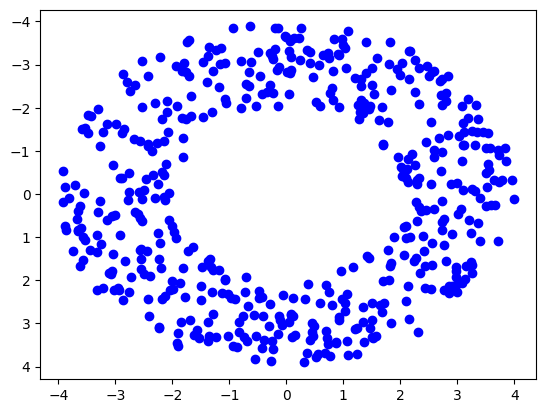

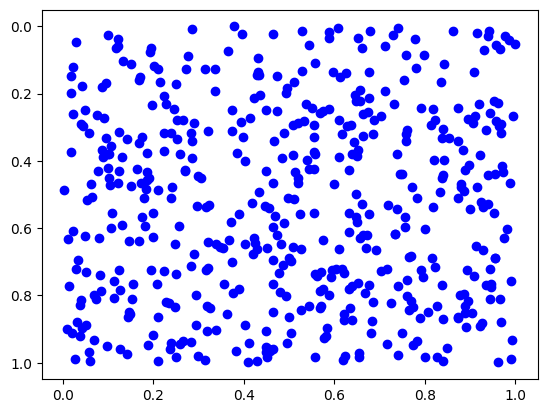

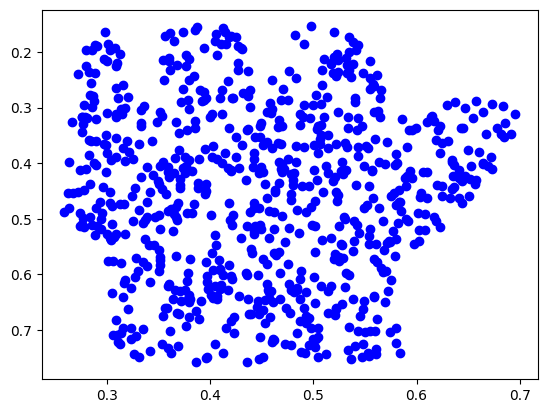

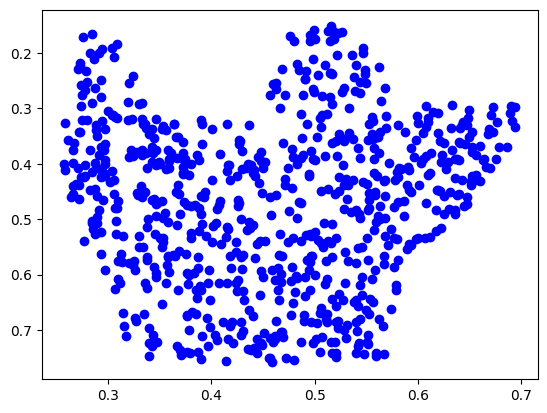

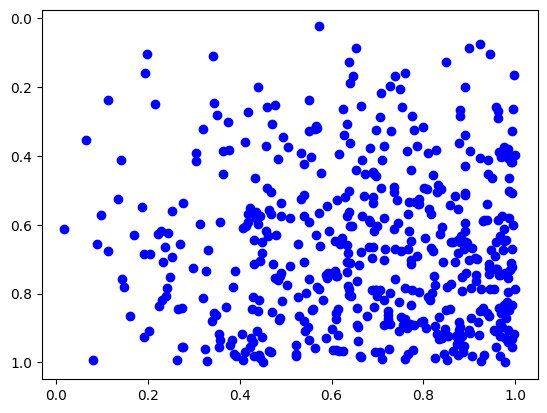

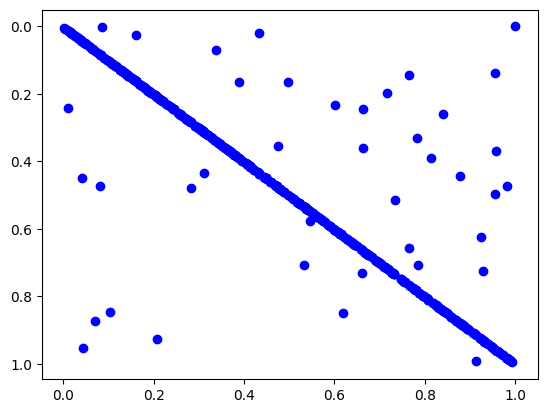

In [27]:
plotGraph(donut_data)
plotGraph(rect_data)
plotGraph(hand)
plotGraph(no_finger_hand)
plotGraph(rect_data_non_uniform1)
plotGraph(rect_data_non_uniform2)


---


**<h1 align="center">Part A</h1>**


---


### **Create the topological order of the neurons**



In [19]:
def makeNeuronsByDist(dist, num_neurons, lst_size = None):
  neurons = None
  if dist == 'line':
    neurons = np.zeros((num_neurons,2))
    neurons[:,1] = 0.4
    neurons[:,0] = np.random.rand(num_neurons)
  elif dist == 'circle':
     neurons = np.zeros((num_neurons,2))
     radius = 2
     thetas = np.random.uniform(0,2 * np.pi, num_neurons)
     neurons[:,0] = np.sin(thetas) * radius
     neurons[:,1] = np.cos(thetas) * radius
  elif dist == 'hand':
    neurons = hand[np.random.randint(0,hand.shape[0], num_neurons),:]

  if neurons is None:
    return None
  if lst_size is None:
    return neurons

  lst = []
  for i in range(lst_size):
    lst.append(neurons.copy())
  return lst



### **Running Kohonan algorithm with 20 neurons on a line to fit the rectangle Distribution**

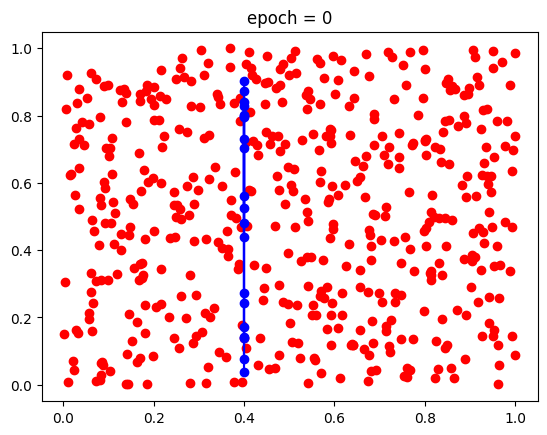

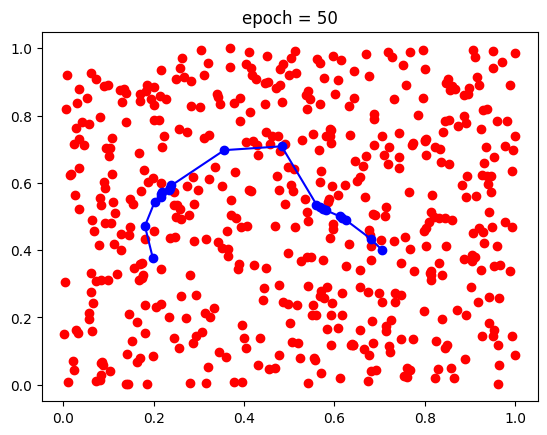

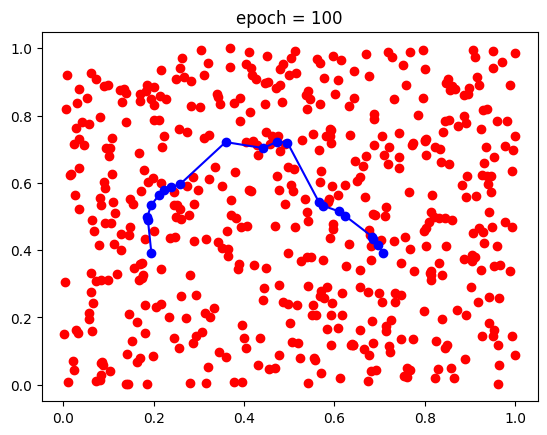

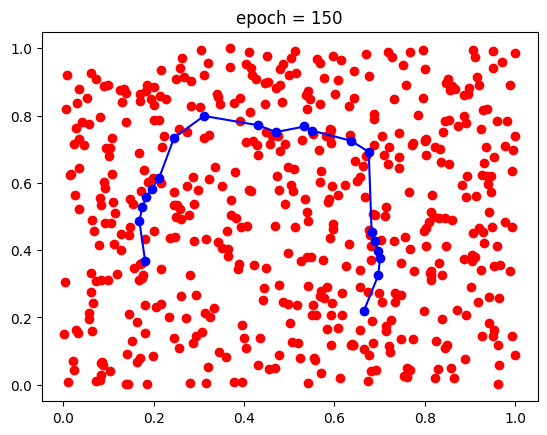

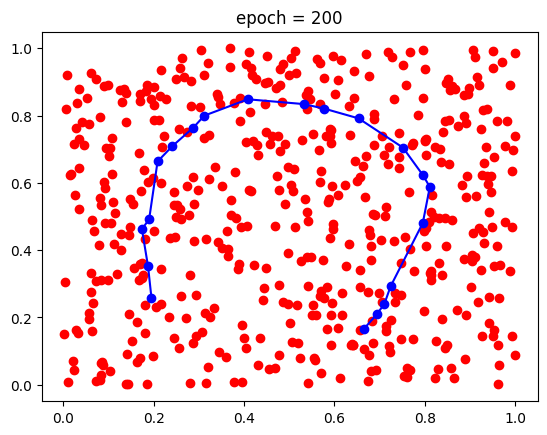

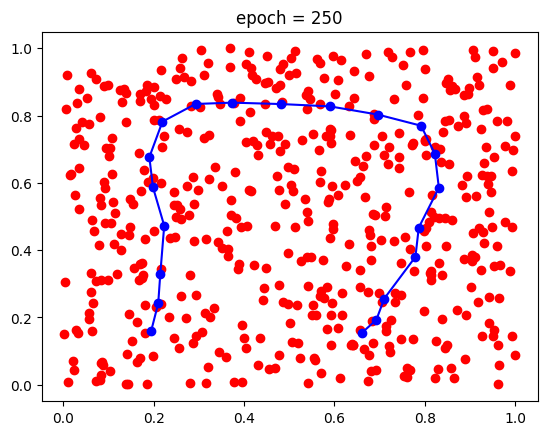

In [16]:
# Running Kohonan algorithm with 20 neurons on a line to fit the rectangle Distribution

num_neurons = 20
neurons = np.zeros((num_neurons,2))
neurons[:,0] = 0.4
neurons[:,1] = np.random.rand(num_neurons)
P = dict(enumerate(rect_data,0))
N = dict(enumerate(neurons,0))
# find best variables
epoches = 300
learning_rate = 0.2
neighborhood_size = 15
neighborhood_radius = len(N)/2
train(P,N , epoches, learning_rate, neighborhood_size, neighborhood_radius)

## **Running Kohonan algorithm with 200 neurons on the rectangle Distribution**

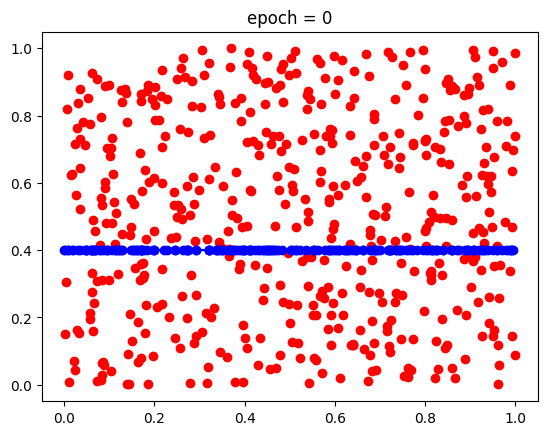

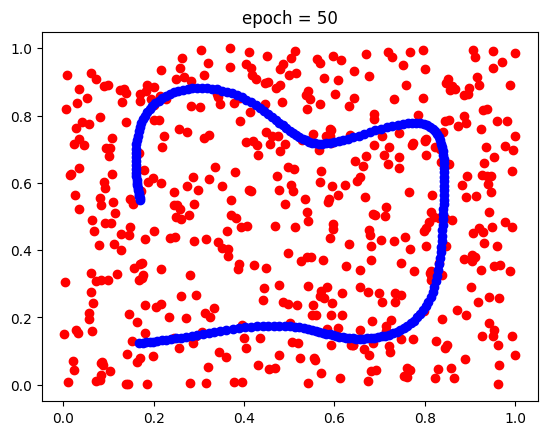

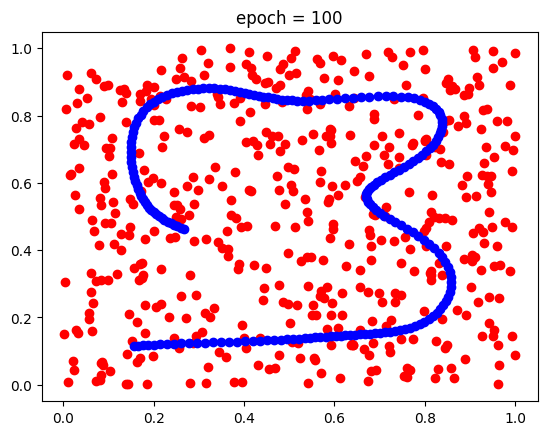

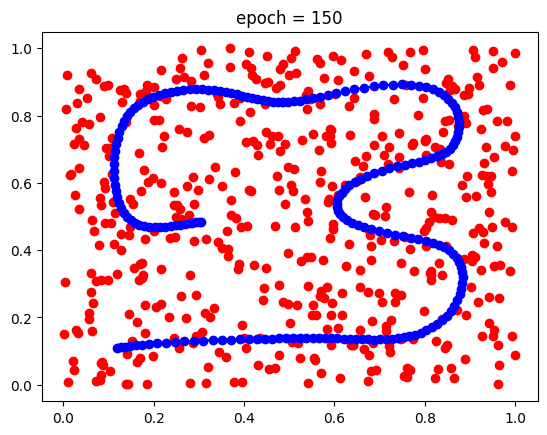

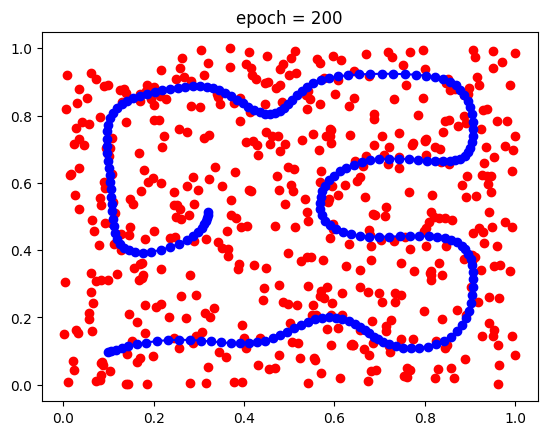

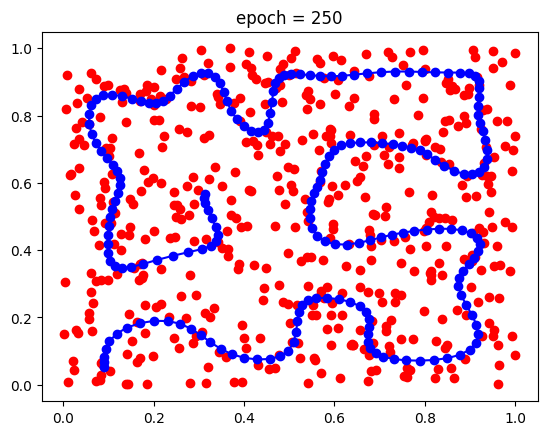

In [17]:
# Running Kohonan algorithm with 200 neurons on the rectangle Distribution
num_neurons = 200
neurons = np.zeros((num_neurons,2))
neurons[:,1] = 0.4
neurons[:,0] = np.random.rand(num_neurons)
P = dict(enumerate(rect_data,0))
N = dict(enumerate(neurons,0))
# find best variables
epoches = 300
learning_rate = 0.2
neighborhood_size = 15
neighborhood_radius = len(N)/2
train(P,N , epoches, learning_rate, neighborhood_size, neighborhood_radius)


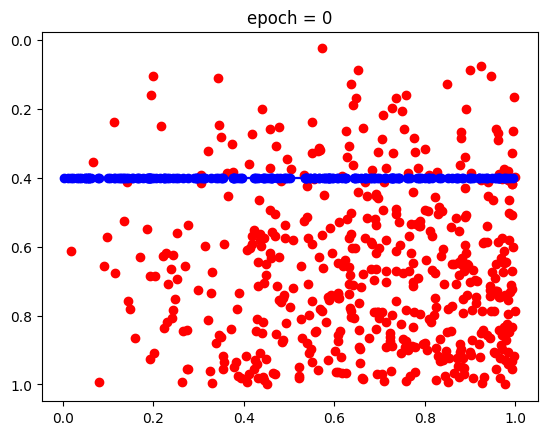

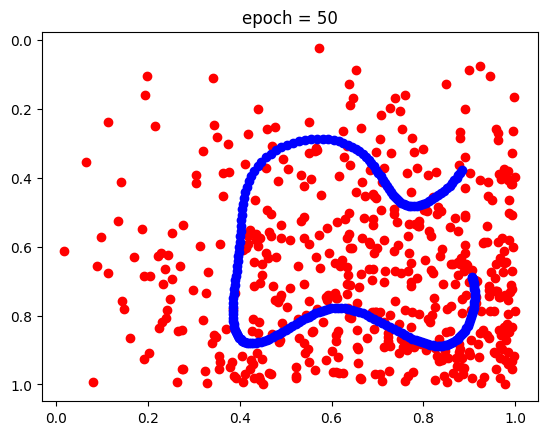

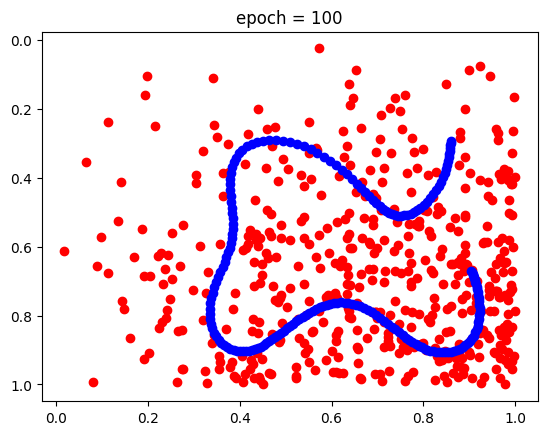

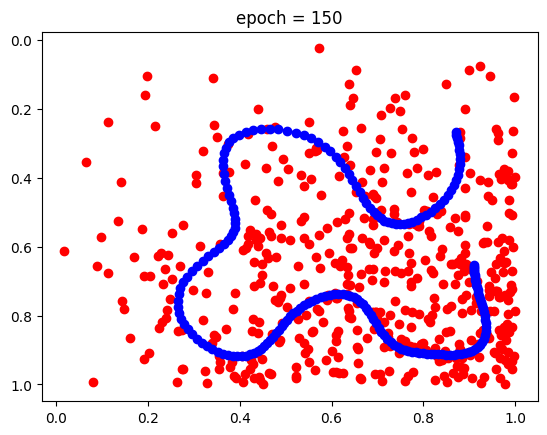

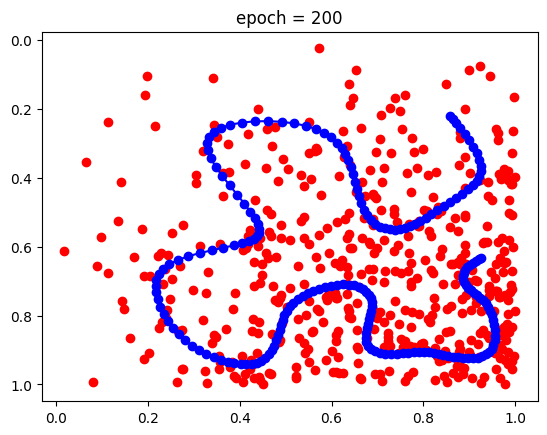

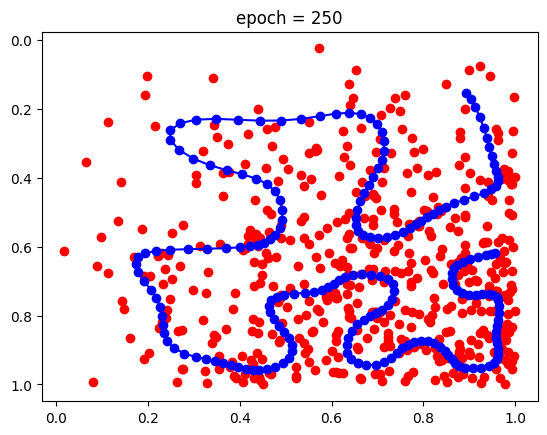

In [29]:
# Running Kohonan algorithm with 200 neurons on the rectangle Distribution
num_neurons = 200
neurons = np.zeros((num_neurons,2))
neurons[:,1] = 0.4
neurons[:,0] = np.random.rand(num_neurons)
P = dict(enumerate(rect_data_non_uniform1,0))
N = dict(enumerate(neurons,0))
# find best variables
epoches = 300
learning_rate = 0.2
neighborhood_size = 15
neighborhood_radius = len(N)/2
train(P,N , epoches, learning_rate, neighborhood_size, neighborhood_radius)


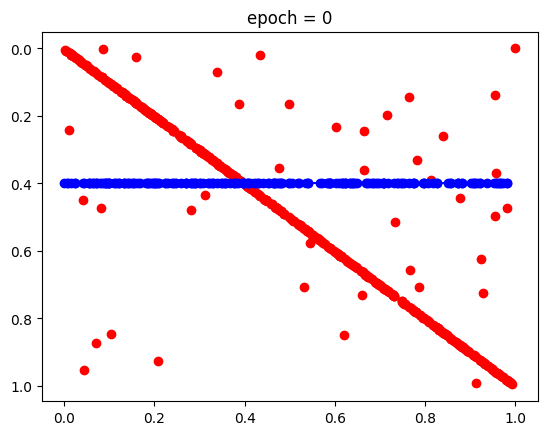

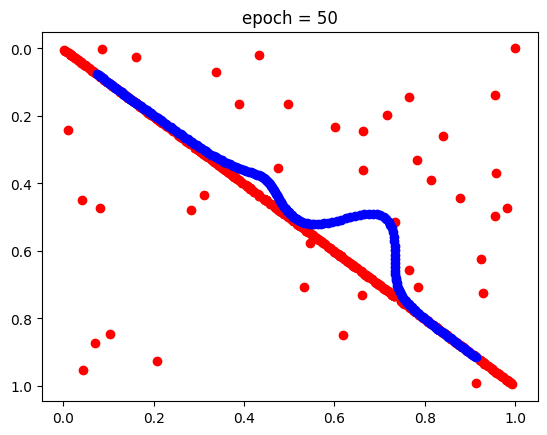

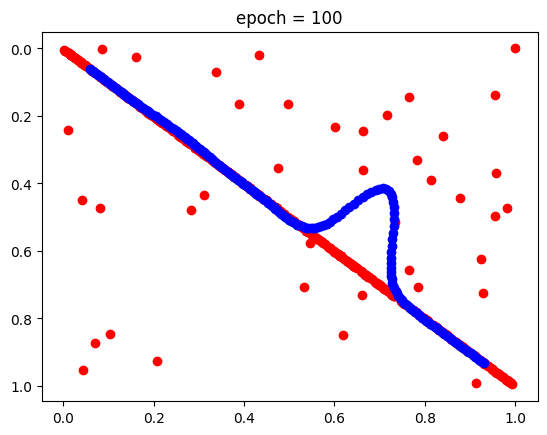

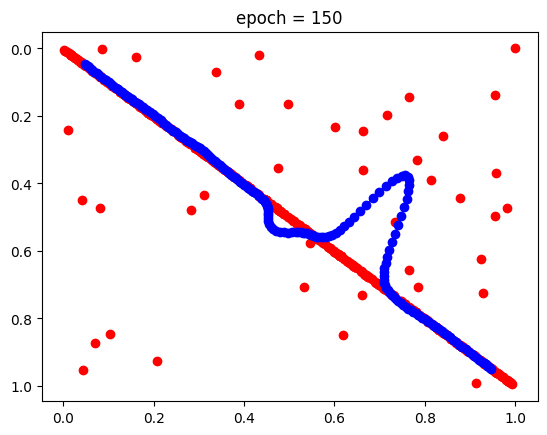

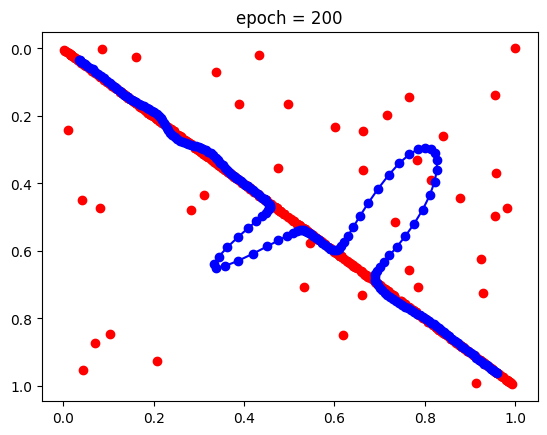

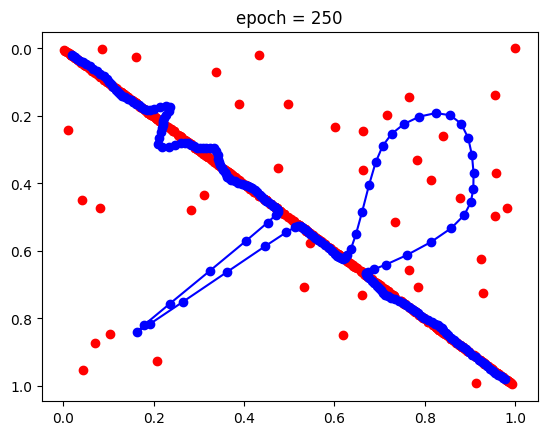

In [30]:
# Running Kohonan algorithm with 200 neurons on the rectangle Distribution
num_neurons = 200
neurons = np.zeros((num_neurons,2))
neurons[:,1] = 0.4
neurons[:,0] = np.random.rand(num_neurons)
P = dict(enumerate(rect_data_non_uniform2,0))
N = dict(enumerate(neurons,0))
# find best variables
epoches = 300
learning_rate = 0.2
neighborhood_size = 15
neighborhood_radius = len(N)/2
train(P,N , epoches, learning_rate, neighborhood_size, neighborhood_radius)




---


**<h1 align="center">Part A.2</h1>**


---



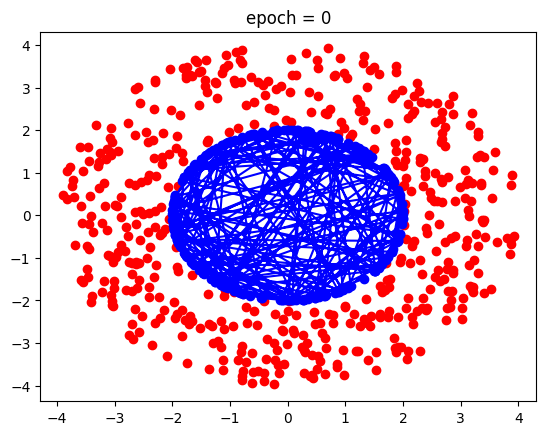

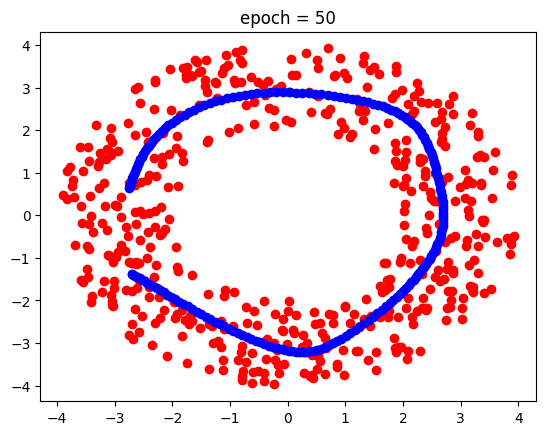

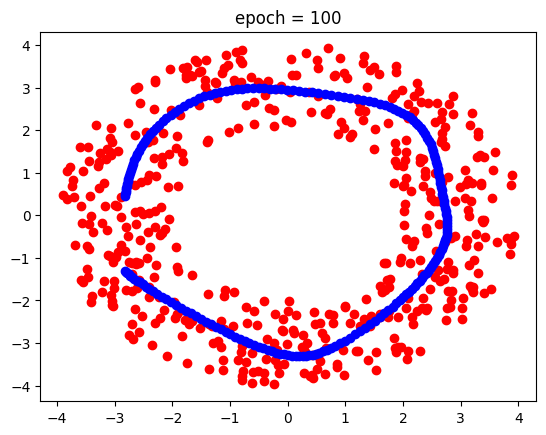

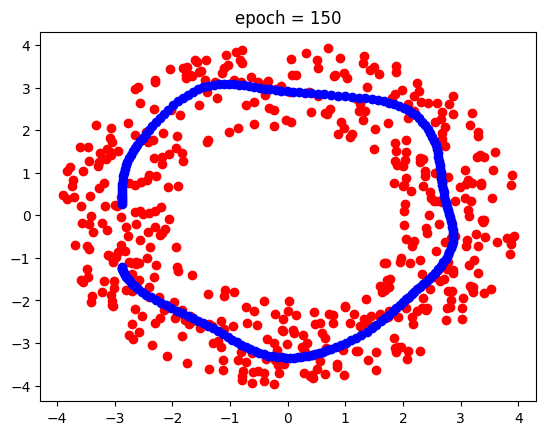

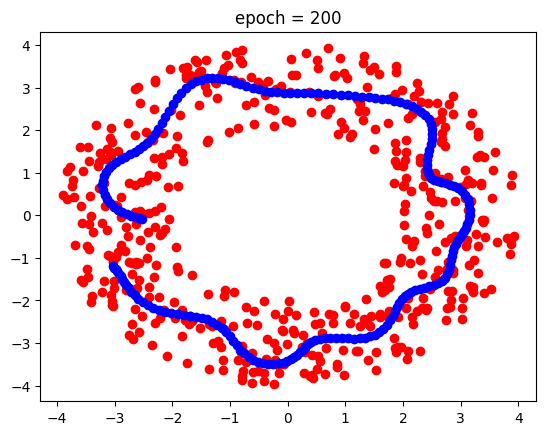

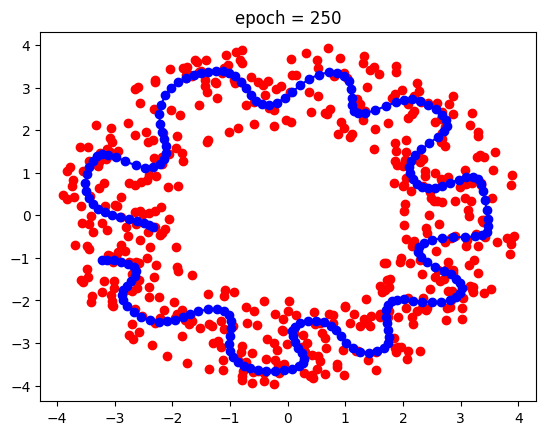

In [20]:
num_neurons = 200
neurons = makeNeuronsByDist('circle', num_neurons)
P = dict(enumerate(donut_data,0))
N = dict(enumerate(neurons,0))

# find best variables
epoches = 300
learning_rate = 0.2
neighborhood_size = 15
neighborhood_radius = len(N)/2
train(P,N , epoches, learning_rate, neighborhood_size, neighborhood_radius)



---

**<h1 align="center">Part B</h1>**


---



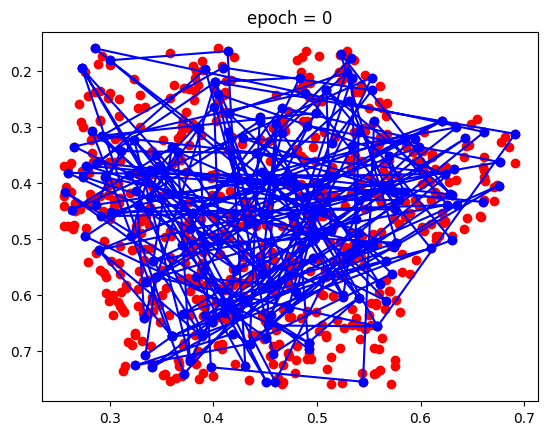

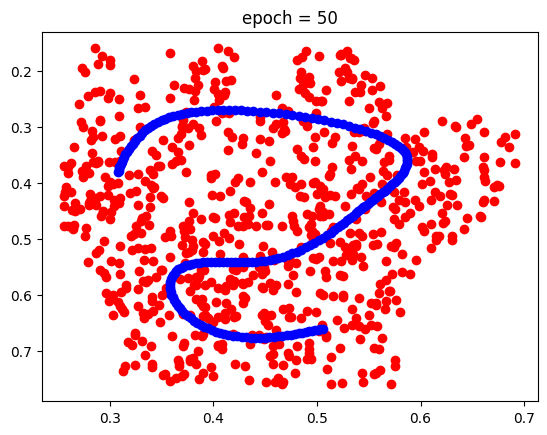

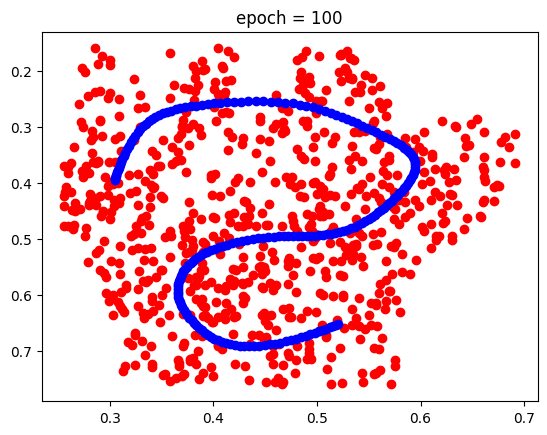

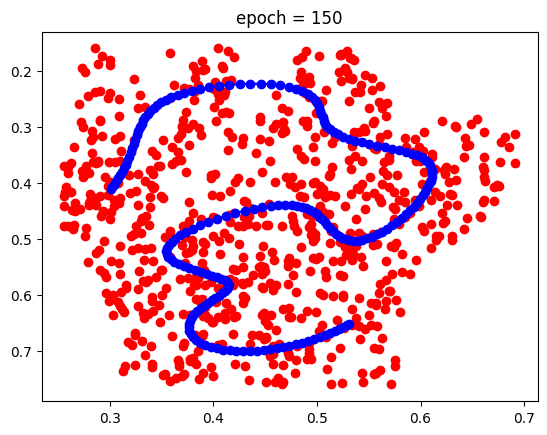

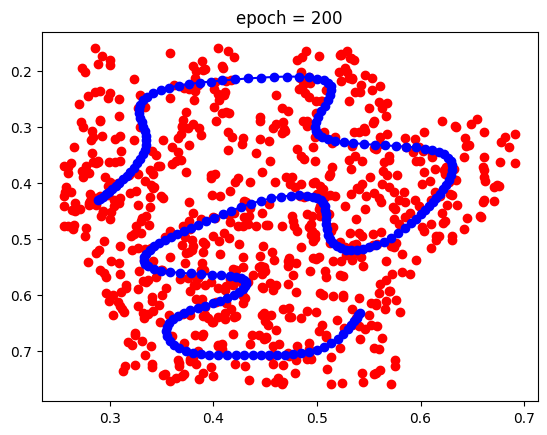

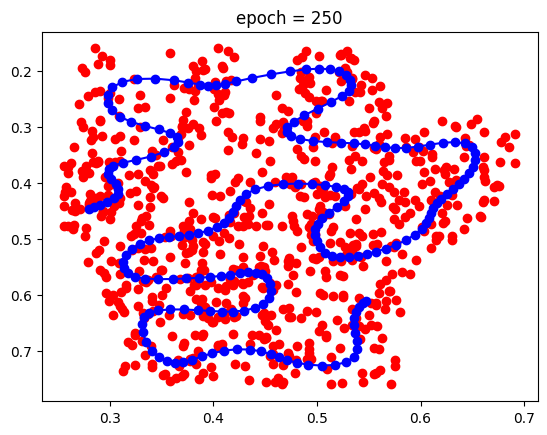

In [24]:
num_neurons = 200
neurons = makeNeuronsByDist('hand', num_neurons)
P = dict(enumerate(hand,0))
N = dict(enumerate(neurons,0))

# find best variables
epoches = 300
learning_rate = 0.2
neighborhood_size = 15
neighborhood_radius = len(N)/2
train(P,N , epoches, learning_rate, neighborhood_size, neighborhood_radius)




---


**<h1 align="center">Part B.2</h1>**


---



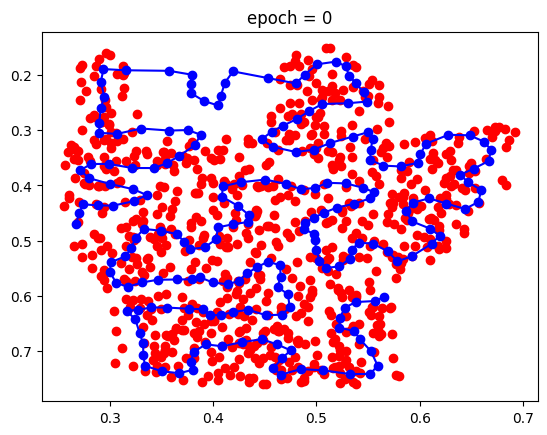

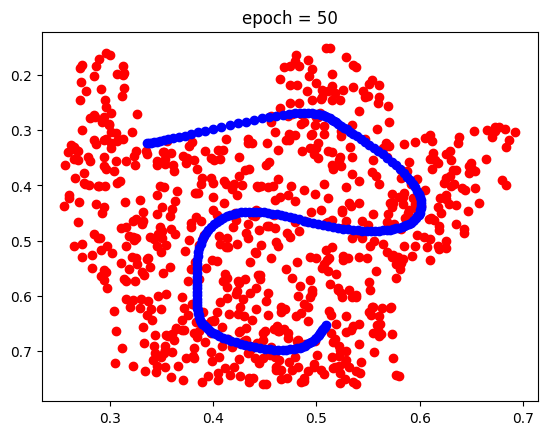

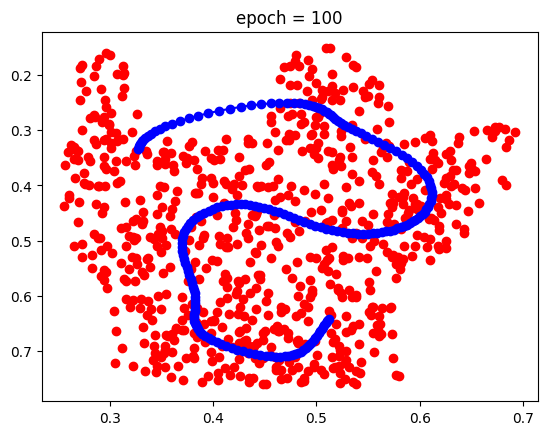

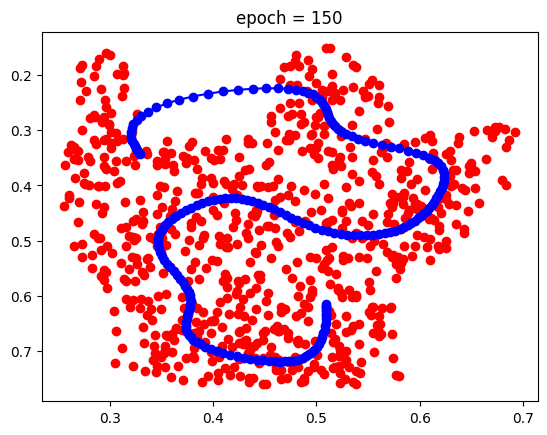

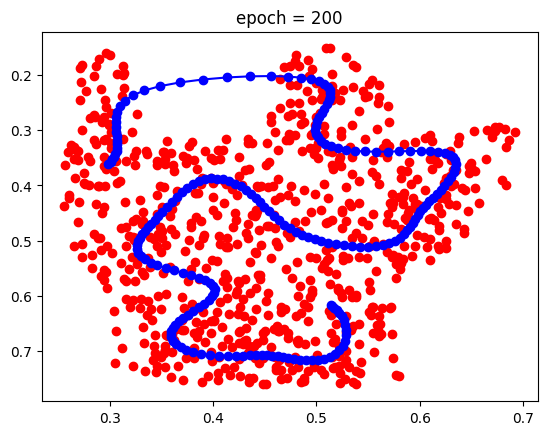

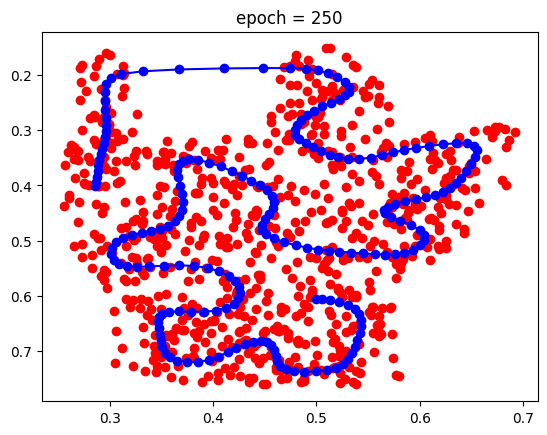

In [25]:
P = dict(enumerate(no_finger_hand,0))
N = dict(enumerate(neurons,0))

# find best variables
epoches = 300
learning_rate = 0.2
neighborhood_size = 15
neighborhood_radius = len(N)/2
train(P,N , epoches, learning_rate, neighborhood_size, neighborhood_radius)


##**Inline Question:**

What happens as the number of iterations of algorithm increases?

**Answer:**

As the number of iterations increases, the network's representation of the input data becomes more refined and accurate. The neurons align themselves in a way that reflects the distribution of the data and the boundaries between different clusters or regions. The network starts to capture the essential features and characteristics of the data.